In [26]:
from cblearn import datasets, preprocessing
import tqdm
import numpy as np


DATASETS = {
   'car', 'food', 'imagenet-v1', 'imagenet-v2', 'nature', 'material', 'musician', 'vogue', 'things'
}


def fetch_dataset(dataset, download_if_missing=False):
    data_home = '../datasets/download'
    match dataset:
        case 'car':
            data = datasets.fetch_car_similarity(data_home, download_if_missing)
            triplets = preprocessing.triplets_from_mostcentral(data.triplet, data.response)
        case 'food':
            data = datasets.fetch_food_similarity(data_home, download_if_missing)
            triplets = data.data
        case 'imagenet-v1':
            data = datasets.fetch_imagenet_similarity(data_home, download_if_missing)
            triplets = preprocessing.triplets_from_multiselect(data.data, data.n_select, is_ranked=data.is_ranked)
        case 'imagenet-v2':
            data = datasets.fetch_imagenet_similarity(data_home, download_if_missing, version='0.2')
            triplets = preprocessing.triplets_from_multiselect(data.data, data.n_select, is_ranked=data.is_ranked)
        case 'nature':
            data = datasets.fetch_nature_scene_similarity(data_home, download_if_missing)
            triplets = data.triplet
        case 'material':
            data = datasets.fetch_material_similarity(data_home, download_if_missing)
            triplets = data.triplet
        case 'musician':
            data = datasets.fetch_musician_similarity(data_home, download_if_missing)
            triplets = data.data
        case 'vogue':
            data = datasets.fetch_vogue_cover_similarity(data_home, download_if_missing)
            triplets = data.triplet
        case 'things':
            data = datasets.fetch_things_similarity(data_home, download_if_missing)
            triplets = preprocessing.triplets_from_oddoneout(data.data)
        case other:
            raise ValueError(f'Unknown dataset `{dataset}`')
    return {
        'train_triplets': triplets,
        'n_objects': np.amax(triplets)
    }
            


def download_all():
    for dataset in (pbar := tqdm.tqdm(DATASETS)):
        pbar.set_description(f"Fetch {dataset} ...")
        data = fetch_dataset(dataset, download_if_missing=True)
        if len(data['train_triplets']) < 1:
            raise ValueError('Something got wrong.')
            

def fetch_all():
    return {
        dataset: fetch_dataset(dataset)
        for dataset in DATASETS
    }

In [27]:
download_all()
data = fetch_all()


Fetch imagenet-v2 ...: 100%|███████████████████████████████████████████████| 9/9 [00:01<00:00,  5.02it/s]


9

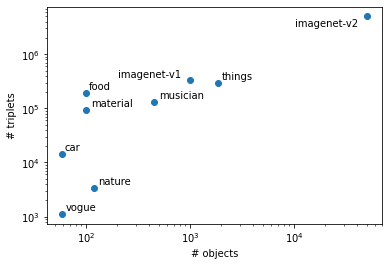

In [42]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

names = data.keys()
X = [data[n]['n_objects'] for n in names]
Y = [len(data[n]['train_triplets']) for n in names]
plt.scatter(X, Y)
plt.xlabel('# objects')
plt.ylabel('# triplets')
plt.yscale('log')
plt.xscale('log')
labels = [plt.text(x, y, name) for name, x, y in zip(names, X, Y)]
adjust_text(labels, expand_points=(1.3, 1.3))  # , arrowprops=dict(arrowstyle='->', color='red')